# import ..

In [1]:
from hdfs import InsecureClient

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# Analysis Hadoop Data

## 1st Try

## 2nd Try

In [2]:
fs = InsecureClient('http://bdata.iptime.org:9999', user='hadoop')
# fs = InsecureClient('http://bdata.iptime.org:9999', user='hadoop')

In [3]:
_path = '/user/hadoop/sports'
_csv = '연령별인구현황_연간_2008-2023.csv'
# 연령별인구현황_연간_2008-2023.csv
with fs.read(f'{_path}/{_csv}', encoding='utf-8') as reader:
    _data = pd.read_csv(reader)

print(_data.columns)

Index(['region', '2008년_계_총인구수', '2008년_계_연령구간인구수', '2008년_계_0~9세',
       '2008년_계_10~19세', '2008년_계_20~29세', '2008년_계_30~39세', '2008년_계_40~49세',
       '2008년_계_50~59세', '2008년_계_60~69세',
       ...
       '2023년_여_10~19세', '2023년_여_20~29세', '2023년_여_30~39세', '2023년_여_40~49세',
       '2023년_여_50~59세', '2023년_여_60~69세', '2023년_여_70~79세', '2023년_여_80~89세',
       '2023년_여_90~99세', '2023년_여_100세 이상'],
      dtype='object', length=625)


In [4]:
_g_cls = ['region'] + list(_data.columns[_data.columns.str.contains('_계_총인구수')])
_data_g = _data[_g_cls]
print(_data_g.columns)

Index(['region', '2008년_계_총인구수', '2009년_계_총인구수', '2010년_계_총인구수',
       '2011년_계_총인구수', '2012년_계_총인구수', '2013년_계_총인구수', '2014년_계_총인구수',
       '2015년_계_총인구수', '2016년_계_총인구수', '2017년_계_총인구수', '2018년_계_총인구수',
       '2019년_계_총인구수', '2020년_계_총인구수', '2021년_계_총인구수', '2022년_계_총인구수',
       '2023년_계_총인구수'],
      dtype='object')


In [5]:
_data_g = _data_g.copy()
_data_g['region'] = _data_g['region'].str.replace(r'\(\w*\)', '', regex=True)
_data_g

,region,2008년_계_총인구수,2009년_계_총인구수,2010년_계_총인구수,2011년_계_총인구수,2012년_계_총인구수,2013년_계_총인구수,2014년_계_총인구수,2015년_계_총인구수,2016년_계_총인구수,2017년_계_총인구수,2018년_계_총인구수,2019년_계_총인구수,2020년_계_총인구수,2021년_계_총인구수,2022년_계_총인구수,2023년_계_총인구수
0,전국,"49,540,367","49,773,145","50,515,666","50,734,284","50,948,272","51,141,463","51,327,916","51,529,338","51,696,216","51,778,544","51,826,059","51,849,861","51,829,023","51,638,809","51,439,038","51,325,329"
1,서울특별시,"10,200,827","10,208,302","10,312,545","10,249,679","10,195,318","10,143,645","10,103,233","10,022,181","9,930,616","9,857,426","9,765,623","9,729,107","9,668,465","9,509,458","9,428,372","9,386,034"
2,부산광역시,"3,564,577","3,543,030","3,567,910","3,550,963","3,538,484","3,527,635","3,519,401","3,513,777","3,498,529","3,470,653","3,441,453","3,413,841","3,391,946","3,350,380","3,317,812","3,293,362"
3,대구광역시,"2,492,724","2,489,781","2,511,676","2,507,271","2,505,644","2,501,588","2,493,264","2,487,829","2,484,557","2,475,231","2,461,769","2,438,031","2,418,346","2,385,412","2,363,691","2,374,960"
4,인천광역시,"2,692,696","2,710,579","2,758,296","2,801,274","2,843,981","2,879,782","2,902,608","2,925,815","2,943,069","2,948,542","2,954,642","2,957,026","2,942,828","2,948,375","2,967,314","2,997,410"
5,광주광역시,"1,422,702","1,433,640","1,454,636","1,463,464","1,469,216","1,472,910","1,475,884","1,472,199","1,469,214","1,463,770","1,459,336","1,456,468","1,450,062","1,441,611","1,431,050","1,419,237"
6,대전광역시,"1,480,895","1,484,180","1,503,664","1,515,603","1,524,583","1,532,811","1,531,809","1,518,775","1,514,370","1,502,227","1,489,936","1,474,870","1,463,882","1,452,251","1,446,072","1,442,216"
7,울산광역시,"1,112,407","1,114,866","1,126,298","1,135,494","1,147,256","1,156,480","1,166,377","1,173,534","1,172,304","1,165,132","1,155,623","1,148,019","1,136,017","1,121,592","1,110,663","1,103,661"
8,세종특별자치시,0,0,0,0,"113,117","122,153","156,125","210,884","243,048","280,100","314,126","340,575","355,831","371,895","383,591","386,525"
9,경기도,"11,292,264","11,460,610","11,786,622","11,937,415","12,093,299","12,234,630","12,357,830","12,522,606","12,716,780","12,873,895","13,077,153","13,239,666","13,427,014","13,565,450","13,589,432","13,630,821"


In [165]:
_data_mlt = _data_g.melt(id_vars='region', var_name='year', value_name='population')
# _data_mlt['year'] = 
_data_mlt['population'] = _data_mlt['population'].str.replace(',', '').astype(int)
_data_mlt['year'] = pd.to_datetime(_data_mlt['year'].str[:4], format='%Y')
_data_mlt.drop(index=[i for i in range(0, 18*16, 18)], inplace=True)
_data_mlt = _data_mlt[_data_mlt['year'] >= '2012']
_data_mlt.sort_values(by=['year', 'population'], ascending=[True, False], inplace=True)
_data_mlt.replace(0, np.nan, inplace=True) # 0값을 NaN으로 변환
_data_mlt.reset_index(drop=True, inplace=True)
_data_mlt.tail(20)

,region,year,population
184,울산광역시,2022-01-01,1110663.0
185,제주특별자치도,2022-01-01,678159.0
186,세종특별자치시,2022-01-01,383591.0
187,경기도,2023-01-01,13630821.0
188,서울특별시,2023-01-01,9386034.0
189,부산광역시,2023-01-01,3293362.0
190,경상남도,2023-01-01,3251158.0
191,인천광역시,2023-01-01,2997410.0
192,경상북도,2023-01-01,2554324.0
193,대구광역시,2023-01-01,2374960.0


# Graph

## Font Style

In [76]:
plt.style.use('default')

d2coding_path = './D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2coding_path)
plt.rcParams['font.family'] = 'D2Coding'

matplotlib.rcParams['axes.unicode_minus'] = False

## Plot

In [146]:
_data_smp = _data_mlt.copy()
# _data_smp = _data_smp[_data_smp['year'] >= '2018']

_data_plts = []
_col_region = list(_data_smp['region'].drop_duplicates())


for _region in _col_region:
    _data_plts.append(_data_smp[_data_smp['region'].str.startswith(_region)])
    # _data_plt
_data_plts[-1]

,region,year,population
16,세종특별자치시,2012-01-01,113117.0
33,세종특별자치시,2013-01-01,122153.0
50,세종특별자치시,2014-01-01,156125.0
67,세종특별자치시,2015-01-01,210884.0
84,세종특별자치시,2016-01-01,243048.0
101,세종특별자치시,2017-01-01,280100.0
118,세종특별자치시,2018-01-01,314126.0
135,세종특별자치시,2019-01-01,340575.0
152,세종특별자치시,2020-01-01,355831.0
169,세종특별자치시,2021-01-01,371895.0


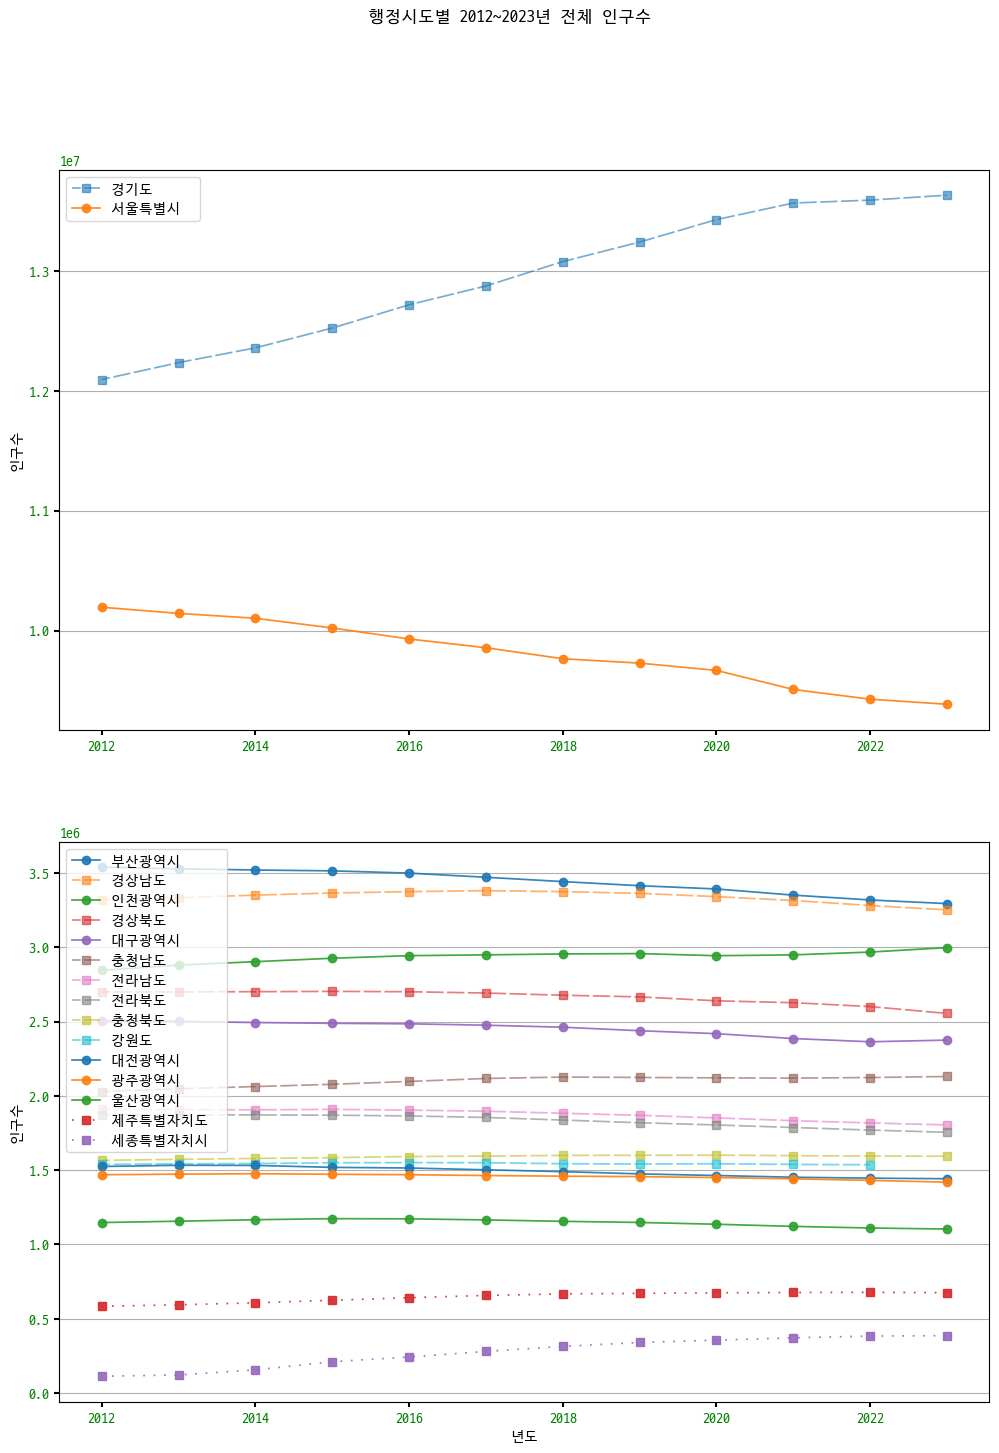

In [164]:
# _gr2 = _data_mlt[_data_mlt['year'] == '2023']
# sns.barplot(x=_gr1['region'], y=_gr1['population'], color='blue', data=_gr1)
fig, axs = plt.subplots(2, 1, figsize=(12, 16))
# fig.set_constrained_layout(constrained=True)
# ax = axs[0]
for i, _data_plt in enumerate(_data_plts):
    ax = axs[0] if _col_region[i].startswith(('서울', '경기')) else axs[1]
    # print(_col_region[i][:-1] == '시')
    linestyle, alpha, marker = \
    ('-', 0.9, 'o') if  _col_region[i][4] == '시' else \
    ((0, (1, 5)), 0.9, 's') if _col_region[i][2] == '특' else \
    ((5, (10, 2)), 0.6, 's')
    ax.plot(_data_plt['year'], _data_plt['population'], linewidth=1.25, linestyle=linestyle, alpha=alpha, marker=marker)   
# ax.bar(_data_plt['year'], _data_plt['population'], width=300, edgecolor='red', linewidth=0.7, alpha=0.6)
# ax.bar(_gr2['region'], _gr2['population'], width=0.75, edgecolor='red', linewidth=0.7, alpha=0.6)
# ax.stem(_gr1['region'], _gr1['population'])
# plt.bar(
#     x=_gr1['region'],
#     height=_gr1['population'],
#     align='center',
# )
# ax.set_xticks(ticks=range(len(_data_plt['year'])), labels=_data_plt['year'])
# ax.set_box_aspect(0.8)
# ax.grid(axis='y')
axs[0].legend(_col_region[:2], loc='upper left')
axs[1].legend(_col_region[2:], loc='upper left')
for ax in axs:    
    ax.margins(y=0.05)
    ax.tick_params(labelcolor='g', labelsize='medium', width=1.5)
    ax.set_ylabel('인구수')
    ax.grid(axis='y')
    # ax.set_xlim(right=3)
plt.suptitle('행정시도별 2012~2023년 전체 인구수')
plt.xlabel('년도')
# plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
plt.savefig('image/population.png')

In [162]:
t = 'abcd'
print(t.endswith(('c', 'd')))
print(_col_region[0].endswith(('도', '시')))
print(_col_region[2][1:])

True
False
산광역시  
